# Data fetching from V1DD physiology data set
## -- the `v1dd_physiology.data_fetching` module
## For drifting grating responses

In [1]:
import h5py
import v1dd_physiology.data_fetching as daf
import matplotlib.pyplot as plt

## Define root directory

In [2]:
# windows
base_folder = r"\\allen\programs\mindscope\workgroups\surround\v1dd_in_vivo_new_segmentation\data"

# # linux and mac
# base_folder = "/allen/programs/mindscope/workgroups/surround/v1dd_in_vivo_new_segmentation/data"

## Define one ROI

In [3]:
mouse_id = '409828'
col_id = '1'
vol_id = '3'
plane_n = 'plane0'
roi_n = 'roi_0017' # 'roi_0016', 'roi_0027', 'roi_0082', 'roi_0086'

## Get the response matrix file object `rm_f`
From the nwb_f file object, the path to corresponding response matrix file can be extracted by `daf.get_rm_path()` function.  
The response matrix file object `rm_f` contains the secondary analysis results, such as spatial receptive field and responses to drifting gratings.

In [4]:
sess_id = f'M{mouse_id}_{col_id}{vol_id}'
nwb_path = daf.get_nwb_path(session_id=sess_id, database_path=base_folder)
nwb_f = h5py.File(nwb_path, 'r')

rm_path = daf.get_rm_path(nwb_f=nwb_f)
print(f'path to response matrix file for session "{sess_id}": \n{rm_path}')

rm_f = h5py.File(rm_path, 'r')

path to response matrix file for session "M409828_13": 
\\allen\programs\mindscope\workgroups\surround\v1dd_in_vivo_new_segmentation\data\response_matrices\response_matrix_M409828_13.hdf5


## Get the drifting grating circle response matrix `dgcrm` 
## `dgcrm` is a subcluss of pandas dataframe
### trace_type
 * `dff`
 * `events`
### dgc_type
 * `full`
 * `windowed`

In [5]:
dgcrm = daf.get_dgcrm(rm_f=rm_f, plane_n=plane_n, roi_n=roi_n, trace_type='dff', dgc_type='windowed')

In [6]:
print(type(dgcrm))

<class 'NeuroAnalysisTools.SingleCellAnalysis.DriftingGratingResponseMatrix'>


In [7]:
dgcrm.shape

(25, 9)

## `NeuroAnalysisTools.SingleCellAnalysis.DriftingGratingResponseMatrix` contains local timestamps of stimulus triggger response as metadata

In [8]:
print(f'trace type: {dgcrm.trace_type}')
print(f'\nsta local timestamps {dgcrm.sta_ts.shape}: \n{dgcrm.sta_ts}')

trace type: sta_dff

sta local timestamps (26,): 
[-1.15629206 -0.99110748 -0.8259229  -0.66073832 -0.49555374 -0.33036916
 -0.16518458  0.          0.16518458  0.33036916  0.49555374  0.66073832
  0.8259229   0.99110748  1.15629206  1.32147664  1.48666123  1.65184581
  1.81703039  1.98221497  2.14739955  2.31258413  2.47776871  2.64295329
  2.80813787  2.97332245]


## Each row is a drifting grating condition

In [9]:
dgcrm.head(5)

,alt,azi,sf,tf,dire,con,rad,onset_ts,matrix
0,-12.4,-8.9,0.0,0.0,0,0.8,15,"[350.88104, 482.99106, 491.99854, 606.09357, 6...","[[-0.03715174, 0.12959158, 0.14424339, 0.16737..."
1,-12.4,-8.9,0.04,1.0,0,0.8,15,"[458.9711, 476.98602, 504.00854, 546.0435, 612...","[[0.052836034, 0.023182672, -0.03338696, -0.10..."
2,-12.4,-8.9,0.04,1.0,30,0.8,15,"[398.92102, 470.98102, 516.01855, 2621.772, 26...","[[-0.044187687, -0.027235115, 0.013222226, -0...."
3,-12.4,-8.9,0.04,1.0,60,0.8,15,"[440.95602, 2432.6145, 2438.6196, 2483.657, 25...","[[0.05108521, -0.007524432, -0.083712906, -0.0..."
4,-12.4,-8.9,0.04,1.0,90,0.8,15,"[353.8835, 404.92603, 464.976, 2480.6545, 2498...","[[-0.00405478, 0.0, -0.06733106, 0.04111566, 0..."


In [10]:
condi_ind = 3
condi_mat = dgcrm.loc[condi_ind, 'matrix']
print(f'condition: {condi_ind}')
print(f'\tgrating center altitude (deg): {dgcrm.loc[condi_ind, "alt"]}')
print(f'\tgrating center azimuth (deg): {dgcrm.loc[condi_ind, "azi"]}')
print(f'\tgrating radius (deg): {dgcrm.loc[condi_ind, "rad"]}')
print(f'\tspatial frequency (cpd): {dgcrm.loc[condi_ind, "sf"]}')
print(f'\ttemporal frequency (Hz): {dgcrm.loc[condi_ind, "tf"]}')
print(f'\tdirection (deg): {dgcrm.loc[condi_ind, "dire"]}')
print(f'\tcontrast: {dgcrm.loc[condi_ind, "con"]}')
print(f'\tshape of resonse matrix (trial x time): {condi_mat.shape}')

condition: 3
	grating center altitude (deg): -12.4
	grating center azimuth (deg): -8.9
	grating radius (deg): 15
	spatial frequency (cpd): 0.04
	temporal frequency (Hz): 1.0
	direction (deg): 60
	contrast: 0.8
	shape of resonse matrix (trial x time): (8, 26)


## It also provides some useful plotting methods

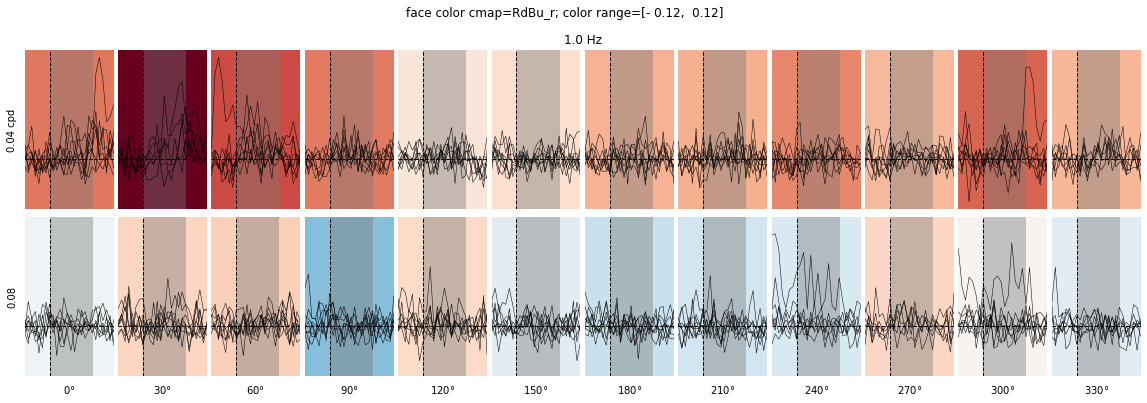

In [11]:
dgcrm_plot = dgcrm.remove_blank_cond()
f = plt.figure(figsize=(20, 6))
_ = dgcrm_plot.plot_all_traces(baseline_win=(-0.5, 0.), response_win=(0., 2.), f=f, color='k', lw=0.5)

## One can use the following methods to collapse trial responses into one number
 * `get_df_response_table()`
 * `get_dff_response_table()`
 * `get_zscore_response_table()`

#### the baseline time window `baseline_win` and response time window `response_win` should be defined as well.  
#### These functions return drifting grating circle response table as `NeuroAnalysisTools.SingleCellAnalysis.DriftingGratingResponseTable` object, which is a subclass of pandas dataframe.

In [12]:
dgcrt, _, _, _ = dgcrm.get_zscore_response_table(baseline_win=(-0.5, 0.), response_win=(0., 2.))

In [13]:
type(dgcrt)

NeuroAnalysisTools.SingleCellAnalysis.DriftingGratingResponseTable

In [14]:
dgcrt.head(5)

,alt,azi,sf,tf,dire,con,rad,resp_mean,resp_max,resp_min,resp_std,resp_stdev
0,-12.4,-8.9,0.0,0.0,0,0.8,15,-0.180365,1.478860,-1.316240,0.976437,0.345222
1,-12.4,-8.9,0.04,1.0,0,0.8,15,0.727719,2.408545,-0.341942,0.941461,0.332857
2,-12.4,-8.9,0.04,1.0,30,0.8,15,1.622574,3.226087,0.766398,0.799077,0.326222
3,-12.4,-8.9,0.04,1.0,60,0.8,15,0.883468,3.735680,-1.764562,1.491945,0.527482
4,-12.4,-8.9,0.04,1.0,90,0.8,15,0.809400,1.754461,-0.411167,0.692883,0.244971


## It also provides some useful plotting methods.

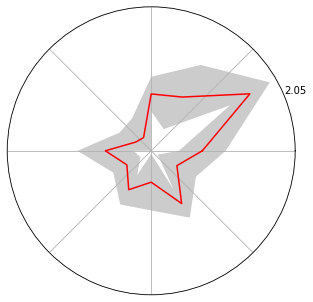

In [15]:
_ = dgcrt.plot_dire_tuning(axis=None, response_dir='pos', is_collapse_sf=False, is_collapse_tf=False,
    trace_color='#ff0000', postprocess='elevate', is_plot_errbar=True, is_normalize=False, is_arc=False)

## From drifting grating circle response table, one can extract direction tuning curves as `NeuroAnalysisTools.SingleCellAnalysis.DirectionTuning` object, which is a subclass of pandas dataframe

In [16]:
dt = dgcrt.get_dire_tuning(is_collapse_sf=False, is_collapse_tf=False)

In [17]:
type(dt)

NeuroAnalysisTools.SingleCellAnalysis.DirectionTuning

In [18]:
dt

,dire,resp_mean,resp_max,resp_min,resp_std,resp_stdev
0,0,0.727719,2.408545,-0.341942,0.941461,0.332857
1,30,1.622574,3.226087,0.766398,0.799077,0.326222
2,60,0.883468,3.735680,-1.764562,1.491945,0.527482
3,90,0.809400,1.754461,-0.411167,0.692883,0.244971
4,120,0.217456,1.149209,-1.710419,0.906894,0.320636
5,150,0.250770,1.559804,-0.864547,0.757048,0.267657
6,180,0.652292,1.341821,-2.195119,1.125365,0.397877
7,210,0.400084,1.431689,-0.504075,0.629547,0.222579
8,240,0.639744,1.447354,-0.871201,0.685402,0.242326
9,270,0.446891,1.647850,-2.234613,1.137166,0.402049


## From direction tuning curve, some response parameters can be easily calculated.

In [19]:
print(f'OSI: {dt.get_osi()}')
print(f'gOSI: {dt.get_gosi()}')
print(f'DSI: {dt.get_dsi()}')
print(f'gDSI: {dt.get_vector_sum()[1]}')

OSI: 0.499141062455455
gOSI: 0.19621185412574402
DSI: 0.6043978629227137
gDSI: 0.22806242428239246
